In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [120]:
df = pd.read_csv(r"C:\Users\benjamin duborjal\OneDrive - AIDEE\Documents\Cours OC\Titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Nettoyage et analyse préliminaire du dataset

In [121]:
df = df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

In [122]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

In [123]:
df.set_index('PassengerId',inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
1,0,3,0,22.0,7.2500,S
2,1,1,1,38.0,71.2833,C
3,1,3,1,26.0,7.9250,S
4,1,1,1,35.0,53.1000,S
5,0,3,0,35.0,8.0500,S
...,...,...,...,...,...,...
887,0,2,0,27.0,13.0000,S
888,1,1,1,19.0,30.0000,S
889,0,3,1,NaN,23.4500,S


In [124]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [125]:
df['Numeric_Embarked'] = df['Embarked'].map({'S':1, 'C': 2, 'Q':3})

In [126]:
df.describe()

,Survived,Pclass,Sex,Age,Fare,Numeric_Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,1.362205
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,3.000000


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          891 non-null    int64  
 1   Pclass            891 non-null    int64  
 2   Sex               891 non-null    int64  
 3   Age               714 non-null    float64
 4   Fare              891 non-null    float64
 5   Embarked          889 non-null    object 
 6   Numeric_Embarked  889 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 55.7+ KB


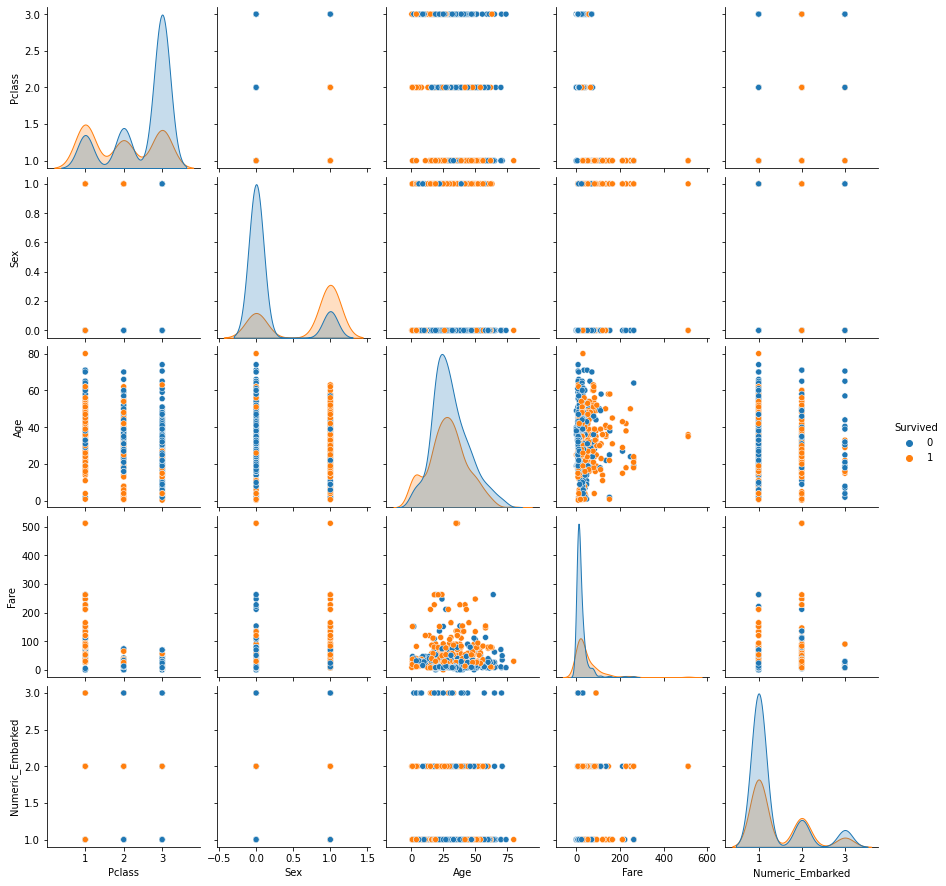

In [128]:
sns.pairplot(data=df, hue='Survived')

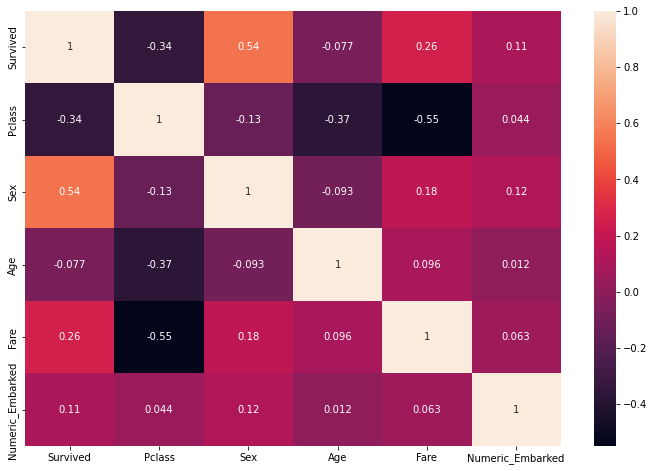

In [129]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [130]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

### Régression et imputation des valeurs manquantes sur la variable age

In [131]:
df_a_imputer = df.loc[df['Age'].isnull()]
df_entrainement = df.loc[(~df['Age'].isnull())]

In [132]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_entrainement[['Pclass', 'Sex', 'Fare']], df_entrainement['Age'])

In [133]:
train_set = pd.merge(Xtrain, Ytrain, on='PassengerId')

In [134]:
age_reg = smf.ols('Age~Pclass+Fare', data=train_set).fit()

In [135]:
age_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     45.43
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           6.11e-19
Time:                        17:28:32   Log-Likelihood:                -2147.2
No. Observations:                 535   AIC:                             4300.
Df Residuals:                     532   BIC:                             4313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6793      2.237     21.764      0.000      44.285      53.073
Pclass        -7.7513      0.835     -9.283      0.000      -9.392      -6.111
Fare          -0.0445      0.013     -3.346      0.001      -0.071      -0.018
==============================================================================
Omnibus:                        6.457   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.323
Skew:                           0.237   Prob(JB):                       0.0424
Kurtosis:                       3.242   Cond. No.                         256.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
Ypred = age_reg.predict(Xtest)

In [137]:
from sklearn import metrics

In [138]:
print('MAE = ', metrics.mean_absolute_error(Ytest, Ypred),
     'RMSE = ', np.sqrt(metrics.mean_squared_error(Ytest, Ypred)))

MAE =  10.272083641374394 RMSE =  13.261767207788477


la variable age ayant une faible faible corrélation avec la classe 'survived' et l'erreur associée à la régression de cette variable étant forte, nous enlèverons les enregistrement ayant une valeur manquante pour cette variable nous pouvons également retirer le lieu d'embarquement car celui ci est peu corrélé avec la classe survived.

In [139]:
dataset = df.loc[(~df['Age'].isnull())][['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

In [140]:
dataset

,Survived,Pclass,Sex,Age,Fare
PassengerId,,,,,
1,0,3,0,22.0,7.2500
2,1,1,1,38.0,71.2833
3,1,3,1,26.0,7.9250
4,1,1,1,35.0,53.1000
5,0,3,0,35.0,8.0500
...,...,...,...,...,...
886,0,3,1,39.0,29.1250
887,0,2,0,27.0,13.0000
888,1,1,1,19.0,30.0000


### Préprocessing des données et analyse en composante principale

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

Vérfication de la présence d'outliers dans le dataset

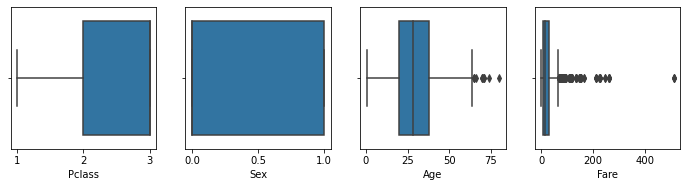

In [142]:
n = len(dataset.columns)

plt.figure(figsize=(12,12))
for i in range(1,n,1):
    plt.subplot(4,4,i)
    #plt.title(df.columns[i])
    sns.boxplot(data=df, x=df.columns[i])

la variable fare contenant beaucoup d'outliers 2 solutions s'offrent à nous, la première serait d'utiliser un robust scaller sur l'integralité du dataset, la seconde serait d'éliminer ces outliers par la méthode interquartile et utiliser un standard scaller.

In [143]:
dataset_features = dataset[['Pclass', 'Sex', 'Age', 'Fare']]
dataset_target = dataset['Survived']
dataset_label = dataset.columns

In [144]:
Rob_scal = RobustScaler()
Rob_scalled_feature = Rob_scal.fit_transform(dataset_features)

In [145]:
dataset_label.tolist()

['Survived', 'Pclass', 'Sex', 'Age', 'Fare']

In [146]:
df_rob_scalled = pd.DataFrame(Rob_scalled_feature)
df_rob_scalled.columns =  dataset_label.tolist()[1:]

In [147]:
df_rob_scalled

,Pclass,Sex,Age,Fare
0,0.5,0.0,-0.335664,-0.335309
1,-0.5,1.0,0.559441,2.193153
2,0.5,1.0,-0.111888,-0.308655
3,-0.5,1.0,0.391608,1.475155
4,0.5,0.0,0.391608,-0.303720
...,...,...,...,...
709,0.5,1.0,0.615385,0.528462
710,0.0,0.0,-0.055944,-0.108261
711,-0.5,1.0,-0.503497,0.563013
712,-0.5,0.0,-0.111888,0.563013


In [148]:
pca = PCA(n_components=4)
Rob_PCA = pca.fit_transform(df_rob_scalled)

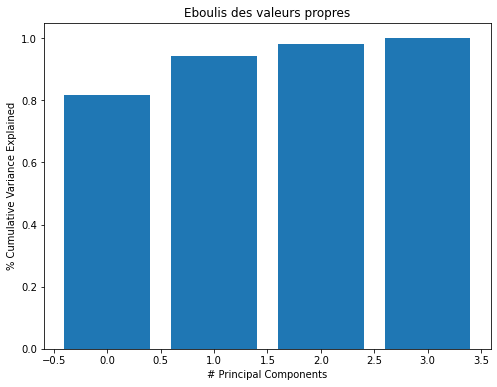

In [149]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)


fig, ax = plt.subplots(figsize=(8,6))
plt.title("Eboulis des valeurs propres")
ax.bar(range(0,4), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained')
plt.show()

<AxesSubplot:>

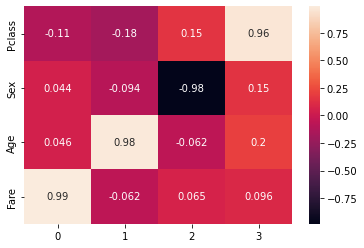

In [150]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = dataset_label.tolist()[1:]
sns.heatmap(pcs.T, annot=True)

In [151]:
dataset_target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 714, dtype: int64

<AxesSubplot:>

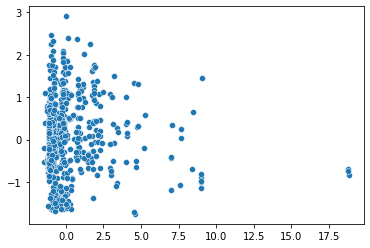

In [152]:
sns.scatterplot(data=Rob_PCA, x=Rob_PCA[:, 0], y=Rob_PCA[:,1])

### Prédiction de la classe survived par regression logistique.  

In [153]:
Xtrain_logit, Xtest_logit, Ytrain_logit, Ytest_logit = train_test_split(dataset_features, dataset_target)

In [154]:
logit = sm.Logit(Ytrain_logit, Xtrain_logit).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.470186
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  535
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            3
Date:                Thu, 29 Dec 2022   Pseudo R-squ.:                  0.3014
Time:                        17:28:34   Log-Likelihood:                -251.55
converged:                       True   LL-Null:                       -360.06
Covariance Type:            nonrobust   LLR p-value:                 8.831e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6169      0.085     -7.218      0.000      -0.784      -0.449
Sex            2.5849      0.231     11.173      0.000       2.131       3.038
Age           -0.0115      0.006     -1.942      0.052      -0.023       0.000
Fare           0.0056      0.002      2.326      0.020       0.001       0.010
==============================================================================
"""

In [155]:
Ypred_logit = logit.predict(Xtest_logit) > 0.5

In [156]:
from sklearn.metrics import confusion_matrix, classification_report

In [157]:
confusion_matrix(Ytest_logit, Ypred_logit)

array([[86, 17],
       [26, 50]], dtype=int64)

In [158]:
print(classification_report(Ytest_logit, Ypred_logit))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       103
           1       0.75      0.66      0.70        76

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



au total 76% des enregistrement on été correctement prédits par la régression logistique, peut mieux faire...

### Prédiction de la classe survived par KNN

In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV